Machine Learning Methods used here:
1. Logistic Regression
2. Support Vector Machines**
3. Decision Tree
4. K Nearest Neighbors
5. Ensemble Methods(Random Forest, Adaboost, Gradient Boost)

За основу был взят ноутбук: https://www.kaggle.com/sanchitvj/sdss-dr16-data-analysis/notebook

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Importing Required Libraries and Reading Data

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls

%matplotlib inline

In [3]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import joblib

Загружаем основную выборку со всеми классами:

In [4]:
df = pd.read_csv('./input/SpecPhotoAll_mali_na.csv') #запущена другая выборка

df.head()

,objID,ra,dec,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
0,1237671256908628119,71.158077,21.333093,0.000127,0.000007,STAR,K3,18.60245,16.39218,15.41919,15.02712,14.80693,18.56369,16.39435,15.41744,15.03489,14.80436
1,1237662224090988683,245.087060,21.761936,-0.000114,0.000021,STAR,WDhotter,17.05462,17.11506,17.52513,17.79336,18.08322,17.04298,17.10623,17.50796,17.80872,18.10710
2,1237678439696957925,31.079203,3.429988,0.600258,0.000121,GALAXY,NaN,24.68714,22.30432,20.88555,19.98248,19.67558,24.76204,21.75368,20.48914,19.52968,19.21125
3,1237658205035823360,144.343990,42.530499,3.204911,0.000755,QSO,NaN,24.69678,21.42912,21.20449,21.01514,21.40008,24.90437,21.41079,21.20130,21.02791,21.41992
4,1237667113333817747,142.735950,25.753559,2.302619,0.000296,QSO,BROADLINE,21.99980,21.40259,21.57071,21.51316,20.84446,21.94518,21.32935,21.49114,21.23290,20.86414


Загружаем выборку со всем звездами:

In [5]:
df_star = pd.read_csv('./input/SpecPhotoAll_star.csv') 

df_star.head()

,specObjID,objID,ra,dec,mjd,plate,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
0,2.994933e+17,1237650795146576079,146.91375,-0.644481,51602,266,0.000661,0.000023,STAR,A0,19.40501,18.10427,18.09704,18.12775,18.21595,19.44499,18.06640,18.09170,18.14841,18.23063
1,2.994935e+17,1237650795146576079,146.91375,-0.644481,51630,266,0.000601,0.000020,STAR,A0,19.40501,18.10427,18.09704,18.12775,18.21595,19.44499,18.06640,18.09170,18.14841,18.23063
2,2.994954e+17,1237650795683643399,147.25534,-0.319337,51602,266,-0.000203,0.000017,STAR,WD,16.95076,16.51067,16.64215,16.81274,17.01157,16.94926,16.49637,16.64236,16.81133,17.01308
3,2.994965e+17,1237650795683643399,147.25534,-0.319337,51630,266,-0.000244,0.000018,STAR,WD,16.95076,16.51067,16.64215,16.81274,17.01157,16.94926,16.49637,16.64236,16.81133,17.01308
4,2.994974e+17,1237648721216340121,147.09176,-0.077346,51602,266,0.000603,0.000177,STAR,WD,20.46657,20.06338,20.32423,20.55201,21.10359,20.43325,20.05210,20.30676,20.46825,21.10327


# Анализируем данные 

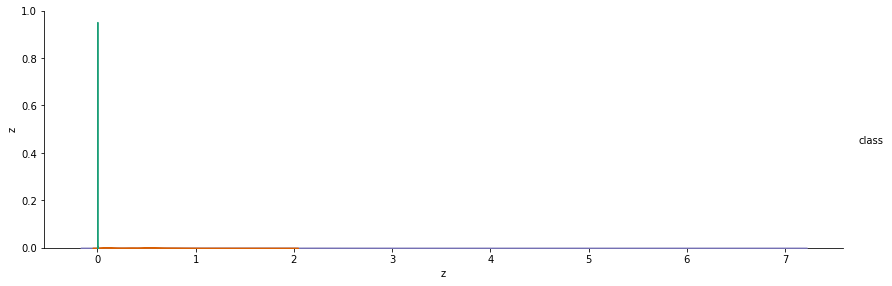

In [6]:
sns.pairplot(data = df, palette = 'Dark2', vars='z', hue = 'class', height=4, aspect=3)

In [7]:
sum(df['cModelMag_r'] < 0)

146

In [8]:
df = df.loc[df['cModelMag_r'] > 0]
df.shape

(5241572, 17)

In [9]:
print(df_star.shape)
df_star = df_star.loc[df_star['cModelMag_r'] > 0]
df_star.shape

(1103720, 20)


(1103679, 20)

In [10]:
df.shape

(5241572, 17)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5241572 entries, 0 to 5241717
Data columns (total 17 columns):
 #   Column       Dtype  
---  ------       -----  
 0   objID        int64  
 1   ra           float64
 2   dec          float64
 3   z            float64
 4   zErr         float64
 5   class        object 
 6   subClass     object 
 7   psfMag_u     float64
 8   psfMag_g     float64
 9   psfMag_r     float64
 10  psfMag_i     float64
 11  psfMag_z     float64
 12  cModelMag_u  float64
 13  cModelMag_g  float64
 14  cModelMag_r  float64
 15  cModelMag_i  float64
 16  cModelMag_z  float64
dtypes: float64(14), int64(1), object(2)
memory usage: 719.8+ MB


In [12]:
df.describe()

,objID,ra,dec,z,zErr,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
count,5.241572e+06,5.241572e+06,5.241572e+06,5.241572e+06,5.241572e+06,5.241572e+06,5.241572e+06,5.241572e+06,5.241572e+06,5.241572e+06,5.241572e+06,5.241572e+06,5.241572e+06,5.241572e+06,5.241572e+06
mean,1.237665e+18,1.710428e+02,2.404899e+01,6.151072e-01,5.645914e-02,2.222979e+01,2.107634e+01,2.026163e+01,1.968807e+01,1.932292e+01,2.122483e+01,2.039509e+01,1.960548e+01,1.902426e+01,1.864773e+01
std,8.414902e+12,9.495384e+01,1.939210e+01,7.781602e-01,1.814245e+01,3.101479e+01,2.876606e+01,1.721802e+00,1.913861e+01,2.278854e+01,3.102011e+01,2.876653e+01,1.848000e+00,1.964626e+01,2.279793e+01
min,1.237646e+18,9.090791e-05,-1.970271e+01,-1.154793e-02,-6.000000e+00,-9.999000e+03,-9.999000e+03,8.449972e+00,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,1.033073e+01,-9.999000e+03,-9.999000e+03
25%,1.237658e+18,1.247899e+02,6.134966e+00,6.104999e-02,2.494532e-05,2.097721e+01,1.974971e+01,1.905435e+01,1.869567e+01,1.839211e+01,1.983958e+01,1.884655e+01,1.805693e+01,1.768966e+01,1.745094e+01
50%,1.237664e+18,1.731034e+02,2.351110e+01,4.391202e-01,9.516442e-05,2.247772e+01,2.139724e+01,2.059706e+01,2.006323e+01,1.966434e+01,2.113364e+01,2.093074e+01,2.009623e+01,1.942170e+01,1.899175e+01
75%,1.237668e+18,2.255339e+02,3.919553e+01,7.413105e-01,2.098590e-04,2.386296e+01,2.273617e+01,2.153446e+01,2.080624e+01,2.035369e+01,2.244874e+01,2.195489e+01,2.101867e+01,2.037105e+01,1.986304e+01
max,1.237681e+18,3.599999e+02,8.485214e+01,7.051930e+00,3.068822e+04,3.192045e+01,3.032868e+01,2.971638e+01,2.995165e+01,2.748061e+01,3.428534e+01,3.330923e+01,3.088891e+01,3.268382e+01,3.119199e+01


In [13]:
df[df['z'] > 2].shape

(412240, 17)

In [14]:
df['z'].value_counts()

 0.000000    23941
 7.011245      440
 0.004153      228
 0.004153      201
-0.004136      136
             ...  
 0.706739        1
 0.191593        1
 0.496205        1
 0.037252        1
 0.088262        1
Name: z, Length: 4496220, dtype: int64

In [15]:
#df.drop(['run', 'rerun', 'camcol', 'field', 'objid', 'specobjid', 'fiberid'], axis = 1, inplace= True)
#df.head(3)

In [16]:
df.isnull().sum()
df1 = df.copy()

# Распределения звезд по подклассам:

/home/nadia/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='subClass', ylabel='count'>

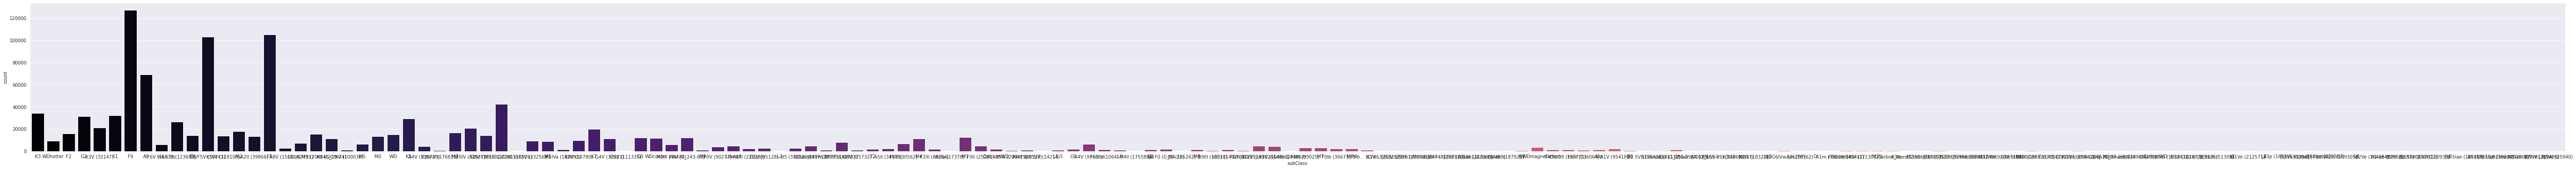

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize = (100, 6))
sns.countplot(df[df['class']=='STAR']['subClass'], palette = 'magma')

In [18]:
df[df['class']=='STAR']['subClass'].value_counts()

F9                 127103
F5                 105298
F3/F5V (30743)     102933
A0                  69106
M5III (221615)      42675
                    ...  
B7IVe (209409)         26
B3Ve (25940)           16
K5III (120933)         16
B2Vne (202904)         14
M5Iab: (197812)        12
Name: subClass, Length: 164, dtype: int64

In [19]:
df[df['subClass']=='O'].shape

(559, 17)

/home/nadia/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='subClass', ylabel='count'>

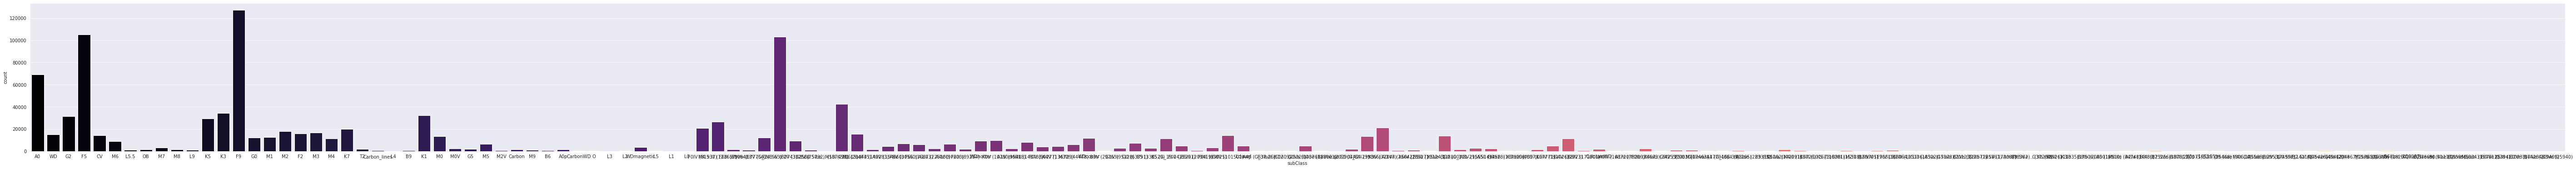

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize = (100, 6))
sns.countplot(df_star['subClass'], palette = 'magma')

Заметим, что подклассы распределены не равномерно. Постараемся объединить некоторые из них их.

In [21]:
sub_class_val = df[df['class'] == 'STAR']['subClass'].value_counts()
sub_class_val

F9                 127103
F5                 105298
F3/F5V (30743)     102933
A0                  69106
M5III (221615)      42675
                    ...  
B7IVe (209409)         26
B3Ve (25940)           16
K5III (120933)         16
B2Vne (202904)         14
M5Iab: (197812)        12
Name: subClass, Length: 164, dtype: int64

In [22]:
def renameSubClass(a, a_str):
    for i in range(len(a)):
        labels = {a[i]: a_str}
        df.replace({'subClass':labels}, inplace = True) ##########

In [23]:
sub_class = df_star['subClass'].unique()
sub_class_val[sub_class[[i for i in range(len(sub_class)) if 'O' in sub_class[i]]]].sum()

3856

Заметим, что звезд подкласса 'O' не так много, попробуем объеденить их с подклассом 'B'

In [24]:
OB = sub_class[[i for i in range(len(sub_class)) if 'O' in sub_class[i]or 'B' in sub_class[i]]]
renameSubClass(OB, 'OB')
sub_class_val[OB].sum() 

/home/nadia/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



16354

In [25]:
M0 = sub_class[[i for i in range(len(sub_class)) if 'M0' in sub_class[i]]]
renameSubClass(M0, 'M0')
M1 = sub_class[[i for i in range(len(sub_class)) if 'M1' in sub_class[i]]]
renameSubClass(M1, 'M1')
M2 = sub_class[[i for i in range(len(sub_class)) if 'M2' in sub_class[i]]]
renameSubClass(M2, 'M2')
M3 = sub_class[[i for i in range(len(sub_class)) if 'M3' in sub_class[i]]]
renameSubClass(M3, 'M3')
M4 = sub_class[[i for i in range(len(sub_class)) if 'M4' in sub_class[i]]]
renameSubClass(M4, 'M4')
M5 = sub_class[[i for i in range(len(sub_class)) if 'M5' in sub_class[i]]]
renameSubClass(M5, 'M5')
M = sub_class[[i for i in range(len(sub_class)) if 'M6' in sub_class[i] or 'M7' in sub_class[i] or 'M8' in sub_class[i] or 'M9' in sub_class[i]]]
renameSubClass(M, 'M')
sub_class_val[M].sum()

24081

In [26]:
A0 = sub_class[[i for i in range(len(sub_class)) if 'A0' in sub_class[i]]]
A12 = sub_class[[i for i in range(len(sub_class)) if 'A1' in sub_class[i] or 'A2' in sub_class[i]]]
A = sub_class[[i for i in range(len(sub_class)) if 'A' in sub_class[i] and 'A0' not in sub_class[i] and 'A1' not in sub_class[i] and 'A2' not in sub_class[i]]]
sub_class_val[A12].sum()

18985

In [27]:
renameSubClass(A0, 'A0')
renameSubClass(A12, 'A12')
renameSubClass(A, 'A')

In [28]:
G0 = sub_class[[i for i in range(len(sub_class)) if 'G0' in sub_class[i]]]
G8 = sub_class[[i for i in range(len(sub_class)) if 'G8' in sub_class[i]]]
G = sub_class[[i for i in range(len(sub_class)) if 'G1' in sub_class[i] or 'G3' in sub_class[i] or 'G5' in sub_class[i] or 'G4' in sub_class[i] or 'G9' in sub_class[i]]]
sub_class_val[G0].sum()

26674

In [29]:
renameSubClass(G0, 'G0')
renameSubClass(G8, 'G8')
renameSubClass(G, 'G')

In [30]:
F8 = sub_class[[i for i in range(len(sub_class)) if 'F8' in sub_class[i]]]
F = sub_class[[i for i in range(len(sub_class)) if 'F9I' in sub_class[i] or 'F5Ib... (17463)' in sub_class[i] or ('F' in sub_class[i] and 'F5' not in sub_class[i] and 'F3/F5V' not in sub_class[i] and 'F8' not in sub_class[i] and 'F9' not in sub_class[i])]]
sub_class_val[F].sum()
#sub_class_val[sub_class[[i for i in range(len(sub_class)) if 'F' in sub_class[i]]]]

77208

In [31]:
renameSubClass(F8, 'F8')
renameSubClass(F, 'F')

In [32]:
K0 = sub_class[[i for i in range(len(sub_class)) if 'K0' in sub_class[i]]]
K = sub_class[[i for i in range(len(sub_class)) if 'K5 (' in sub_class[i] or 'K5I' in sub_class[i] or 'K1V' in sub_class[i] or 'K3I' in sub_class[i] or 'K3p' in sub_class[i] or 'K4' in sub_class[i] or 'K1I' in sub_class[i] or 'K2' in sub_class[i]]]
K
#sub_class_val[sub_class[[i for i in range(len(sub_class)) if 'K' in sub_class[i]]]]

array(['K5 (G_19-24)', 'K1V... (25329)', 'K3Iab: (4817)',
       'K4Iab: (34255)', 'K1IVa (142091)', 'K4III (136726)',
       'K3III (101673)', 'K5 (110281)', 'K2III (115136)', 'K1III (18322)',
       'K5III (111335)', 'K3Ib... (17506)', 'K3p (165195)',
       'K5III (120933)'], dtype=object)

In [33]:
renameSubClass(K0, 'K0')
renameSubClass(K, 'K')

In [34]:
LT = sub_class[[i for i in range(len(sub_class)) if 'L' in sub_class[i] or 'T' in sub_class[i]]]
renameSubClass(LT, 'LT')
sub_class_val[LT]

L5.5      1085
L9        1075
T2        2021
L4          90
L3          53
L2         170
L5         181
L1         110
L0          89
Ldwarf    4869
Name: subClass, dtype: int64

In [35]:
WD1 = sub_class[[i for i in range(len(sub_class)) if 'WD' in sub_class[i] and sub_class[i] != 'WD']]
renameSubClass(WD1, 'WD1')
sub_class_val[WD1]

CarbonWD        382
WDmagnetic     3644
WDhotter       9477
WDcooler      11943
CalciumWD      1940
Name: subClass, dtype: int64

In [36]:
C = sub_class[[i for i in range(len(sub_class)) if 'C' in sub_class[i]]]
renameSubClass(C, 'C')
sub_class_val[C].sum()

18844

In [37]:
print(len(df[df['class']=='STAR']['subClass'].unique()))
df[df['class']=='STAR']['subClass'].value_counts()

32


F9                127103
F5                105298
F3/F5V (30743)    102933
F                  77208
A0                 71331
M5                 49389
M4                 38154
K3                 34239
K1                 32136
G2                 31603
K5                 29338
M1                 27938
WD1                27386
G0                 26674
M                  24081
M3                 23063
A                  23043
K3V (32147)        21233
F8                 20002
K7                 19901
G                  19517
A12                18985
M2                 18880
C                  16522
K                  16438
OB                 16354
M0                 15919
G8                 15619
WD                 14947
K0                 14750
K5Ve (118100)      13943
LT                  9743
Name: subClass, dtype: int64

/home/nadia/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='subClass', ylabel='count'>

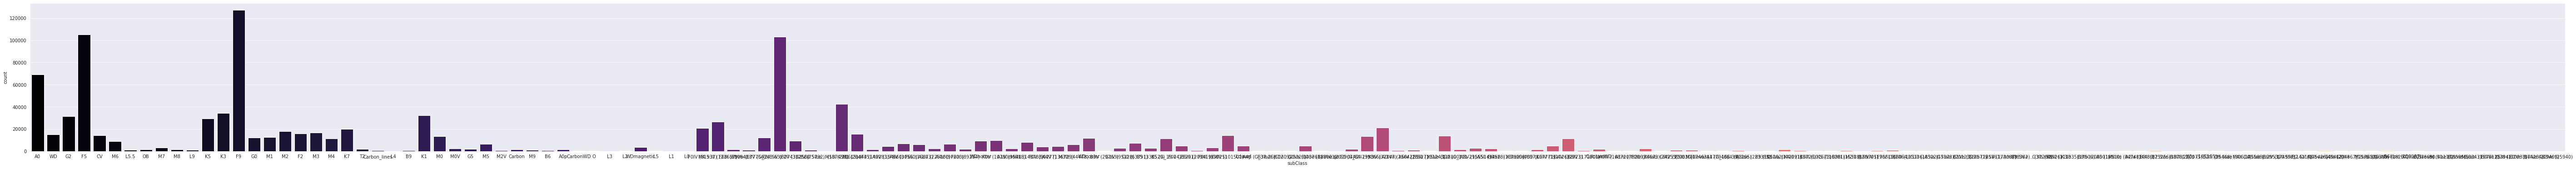

In [38]:
sns.set_style('darkgrid')
plt.figure(figsize = (100, 6))
sns.countplot(df_star['subClass'], palette = 'magma')

In [39]:
df.to_csv('df_done_sub.csv')

# Визуализируем данные

/home/nadia/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='class', ylabel='count'>

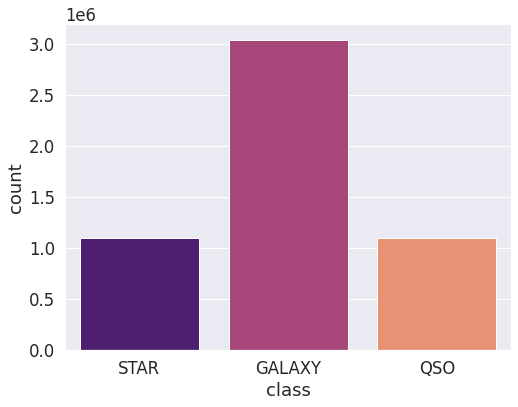

In [101]:
sns.set_style('darkgrid')
plt.figure(figsize = (8, 6))
sns.countplot(df['class'], palette = 'magma')

In [102]:
#sns.pairplot(data = df, palette = 'Dark2', hue = 'class')

ValueError: Could not interpret input 'plate'

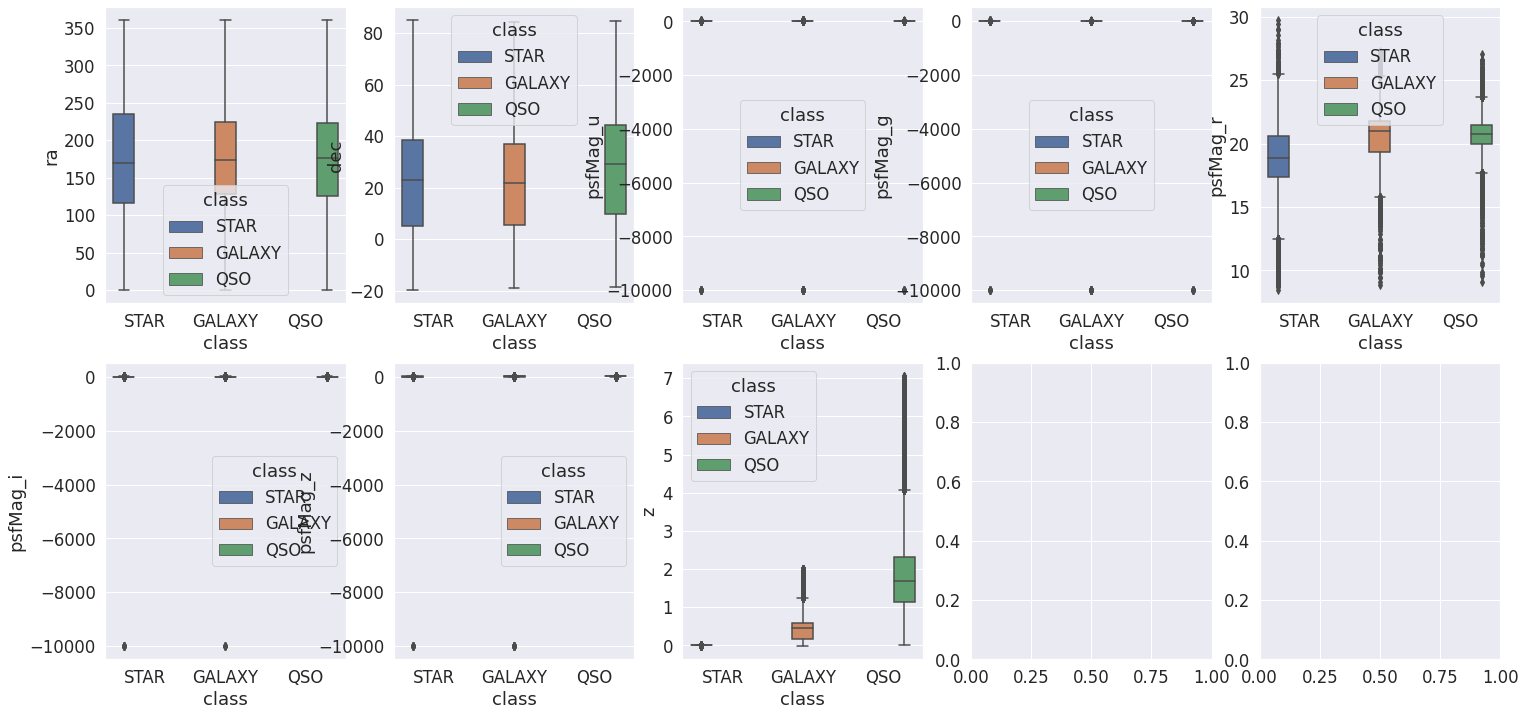

In [103]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(nrows=2, ncols=5, figsize = (25, 12))
sns.boxplot(ax=ax1, x = 'class', y = 'ra', hue = 'class', data = df) 
sns.boxplot(ax=ax2, x = 'class', y = 'dec', hue = 'class', data = df)
sns.boxplot(ax=ax3, x = 'class', y = 'psfMag_u', hue = 'class', data = df)
sns.boxplot(ax=ax4, x = 'class', y = 'psfMag_g', hue = 'class', data = df)
sns.boxplot(ax=ax5, x = 'class', y = 'psfMag_r', hue = 'class', data = df)
sns.boxplot(ax=ax6, x = 'class', y = 'psfMag_i', hue = 'class', data = df)
sns.boxplot(ax=ax7, x = 'class', y = 'psfMag_z', hue = 'class', data = df)
sns.boxplot(ax=ax8, x = 'class', y = 'z', hue = 'class', data = df)
sns.boxplot(ax=ax9, x = 'class', y = 'plate', hue = 'class', data = df)
sns.boxplot(ax=ax10, x = 'class', y = 'mjd', hue = 'class', data = df)

In [17]:
#sns.boxplot(x = 'class', y = 'z', hue = 'class', data = df1)

In [ ]:
sns.lmplot(x = 'plate', y='mjd', data = df, hue='class', col = 'class', palette='Set1', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})
sns.lmplot(x = 'psfMag_i', y='psfMag_z', data = df, hue='class', col = 'class', palette='magma', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})
sns.lmplot(x = 'psfMag_r', y='psfMag_g', data = df, hue='class', col = 'class', palette='Dark2', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='z', ylabel='Density'>

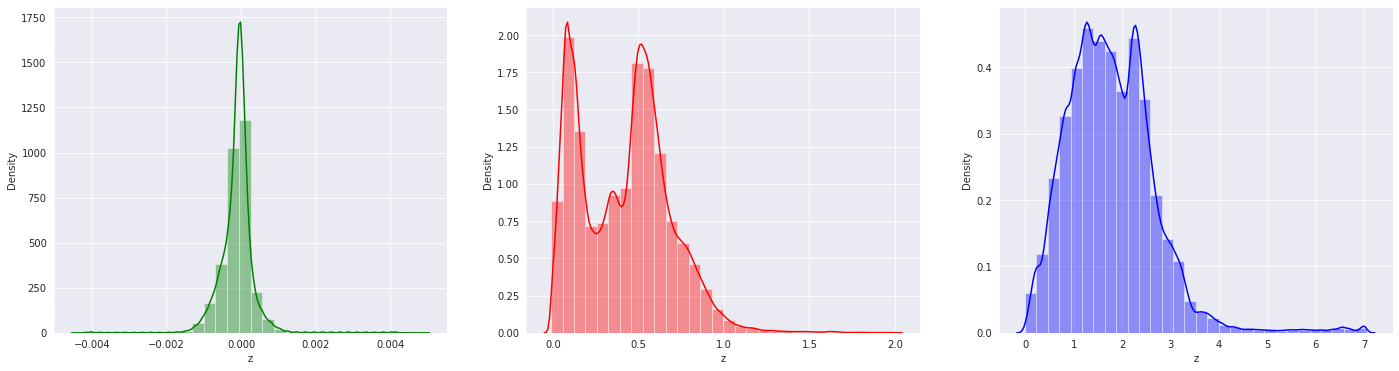

In [75]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (24, 6))
sns.distplot(df[df['class'] == 'STAR'].z, ax = ax1, bins = 30, color = 'g')
sns.distplot(df[df['class'] == 'GALAXY'].z, ax = ax2, bins = 30, color = 'r')
sns.distplot(df[df['class'] == 'QSO'].z, ax = ax3, bins = 30, color = 'b')

Распределение по признаку psfMag_r

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='cModelMag_r', ylabel='Density'>

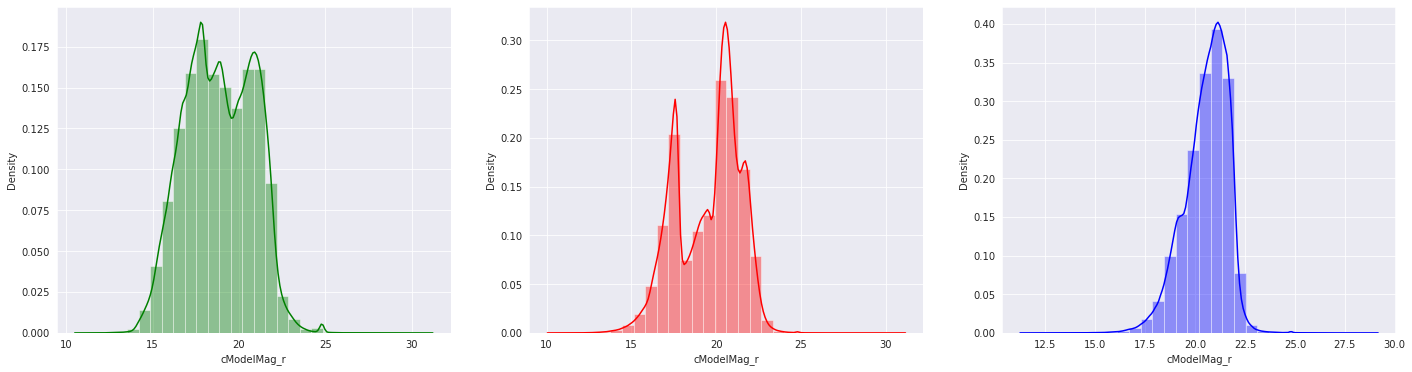

In [77]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (24, 6))
sns.distplot(df[df['class'] == 'STAR'].cModelMag_r, ax = ax1, bins = 30, color = 'g')
sns.distplot(df[df['class'] == 'GALAXY'].cModelMag_r, ax = ax2, bins = 30, color = 'r')
sns.distplot(df[df['class'] == 'QSO'].cModelMag_r, ax = ax3, bins = 30, color = 'b')

In [79]:
df.var()

objID          7.081058e+25
ra             9.016232e+03
dec            3.760535e+02
z              6.055332e-01
zErr           3.291484e+02
psfMag_u       9.619171e+02
psfMag_g       8.274864e+02
psfMag_r       2.964601e+00
psfMag_i       3.662866e+02
psfMag_z       5.193175e+02
cModelMag_u    9.622475e+02
cModelMag_g    8.275135e+02
cModelMag_r    3.415105e+00
cModelMag_i    3.859756e+02
cModelMag_z    5.197456e+02
dtype: float64

<AxesSubplot:>

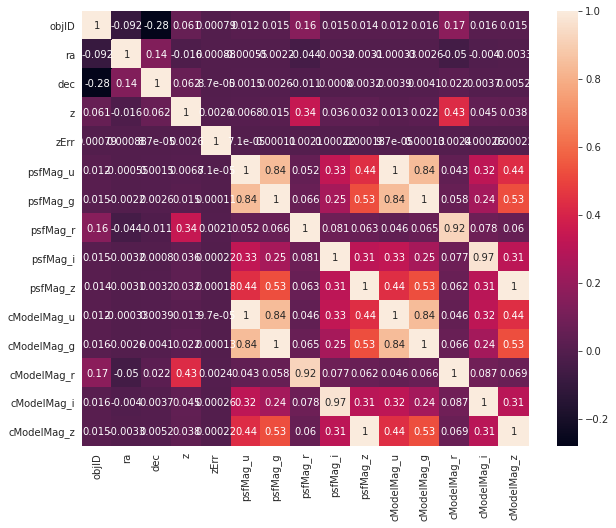

In [80]:
corr = df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True)

# Карта

Загружаем случайным образом выбранные 12,535,000 примеров parallax из gaia с parallax/parallax_error>4:

In [54]:
df_map = pd.read_csv('./input/gaia_ra_dec_2.csv')
df_map.head()

,parallax,parallax_error,ra,dec
0,0.551260,0.069990,255.224788,2.256010
1,0.344124,0.049174,287.599967,30.726736
2,0.964162,0.031111,271.820667,-56.239973
3,3.668616,0.414896,295.101640,-48.178984
4,0.239338,0.056853,286.662234,-9.477072


Загружаем необходимую библиотеку, для работы с данными

In [55]:
from astropy.coordinates import SkyCoord

In [56]:
coord = SkyCoord(ra=df_map['ra'].values, dec=df_map['dec'].values, unit='deg')

In [57]:
df_map['l'] = coord.galactic.l.deg
df_map['b'] = coord.galactic.b.deg
df_map.head()

,parallax,parallax_error,ra,dec,l,b
0,0.551260,0.069990,255.224788,2.256010,21.668372,25.495174
1,0.344124,0.049174,287.599967,30.726736,62.555655,9.773673
2,0.964162,0.031111,271.820667,-56.239973,337.607288,-16.522576
3,3.668616,0.414896,295.101640,-48.178984,350.352975,-27.752351
4,0.239338,0.056853,286.662234,-9.477072,26.169019,-7.660280


In [58]:
df_map.describe()

,parallax,parallax_error,ra,dec,l,b
count,1.253500e+07,1.253500e+07,1.253500e+07,1.253500e+07,1.253500e+07,1.253500e+07
mean,1.210980e+00,1.358819e-01,2.084369e+02,-9.682971e+00,1.865416e+02,-1.140410e+00
std,1.699712e+00,1.851079e-01,9.275254e+01,4.212082e+01,1.169996e+02,2.188466e+01
min,4.845092e-02,9.441471e-03,1.141726e-06,-8.998634e+01,1.593647e-06,-8.990900e+01
25%,4.841163e-01,4.551288e-02,1.265445e+02,-4.653600e+01,7.235881e+01,-1.073062e+01
50%,7.572939e-01,7.704888e-02,2.352046e+02,-1.587181e+01,1.987473e+02,-1.741535e+00
75%,1.368460e+00,1.428559e-01,2.843447e+02,2.611264e+01,2.987435e+02,8.745338e+00
max,9.505882e+02,4.789805e+00,3.600000e+02,8.993419e+01,3.600000e+02,8.987697e+01


In [59]:
df_map['d'] = 1/df_map.parallax #парсек

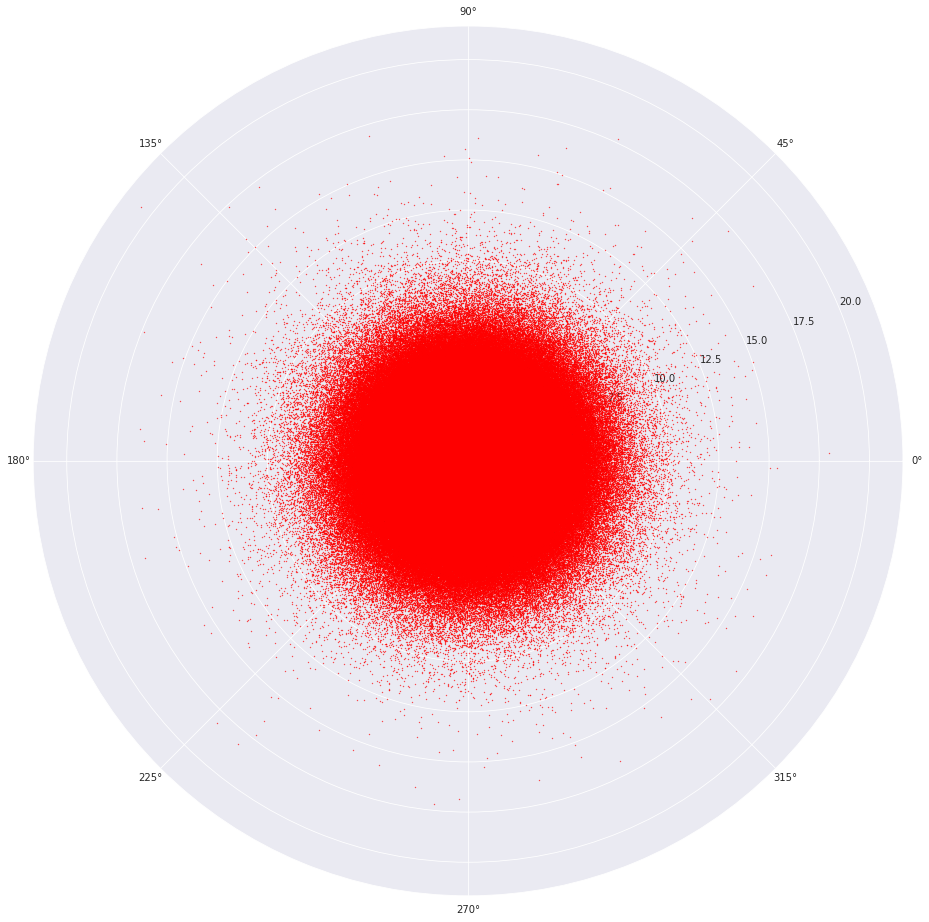

In [60]:
fig, ax = plt.subplots(subplot_kw=dict(polar=True))
ax.scatter(df_map.l, df_map.d, c='r', s = 0.1)
fig.set_figwidth(16)
fig.set_figheight(16)
plt.show()

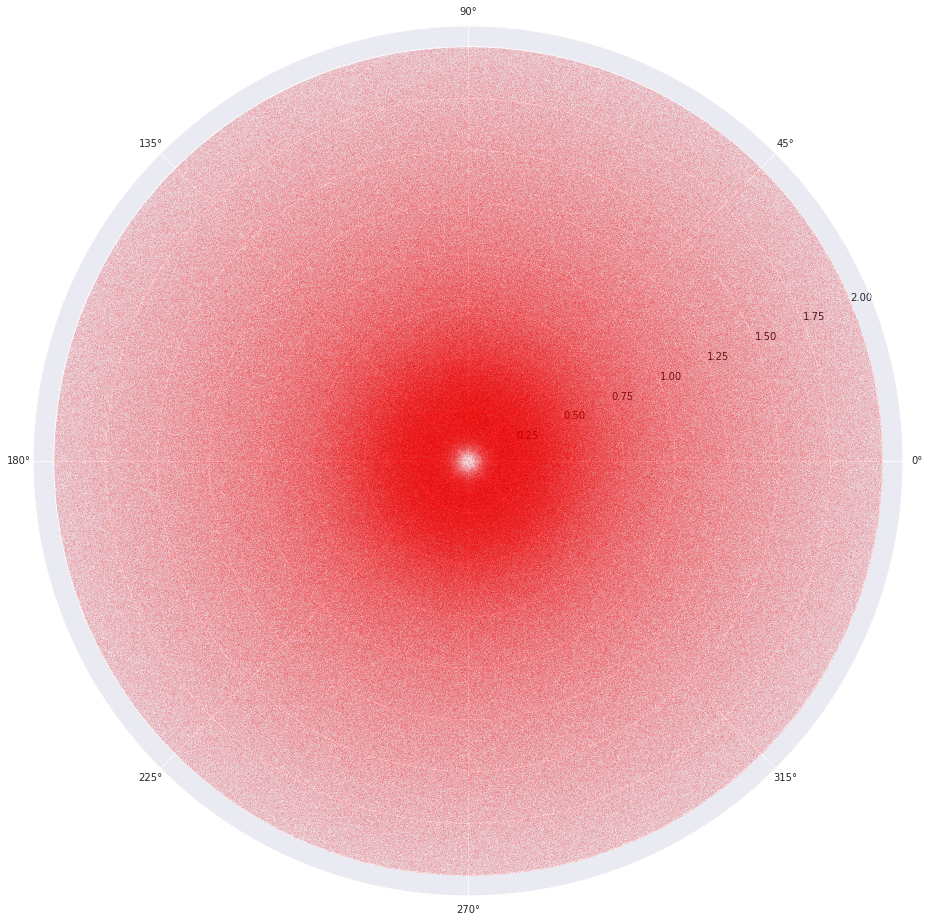

In [61]:
fig, ax = plt.subplots(subplot_kw=dict(polar=True))
ax.scatter(df_map[df_map['d'] < 2].l, df_map[df_map['d'] < 2].d, c='r', s = 0.0001)
fig.set_figwidth(16)
fig.set_figheight(16)
plt.show()

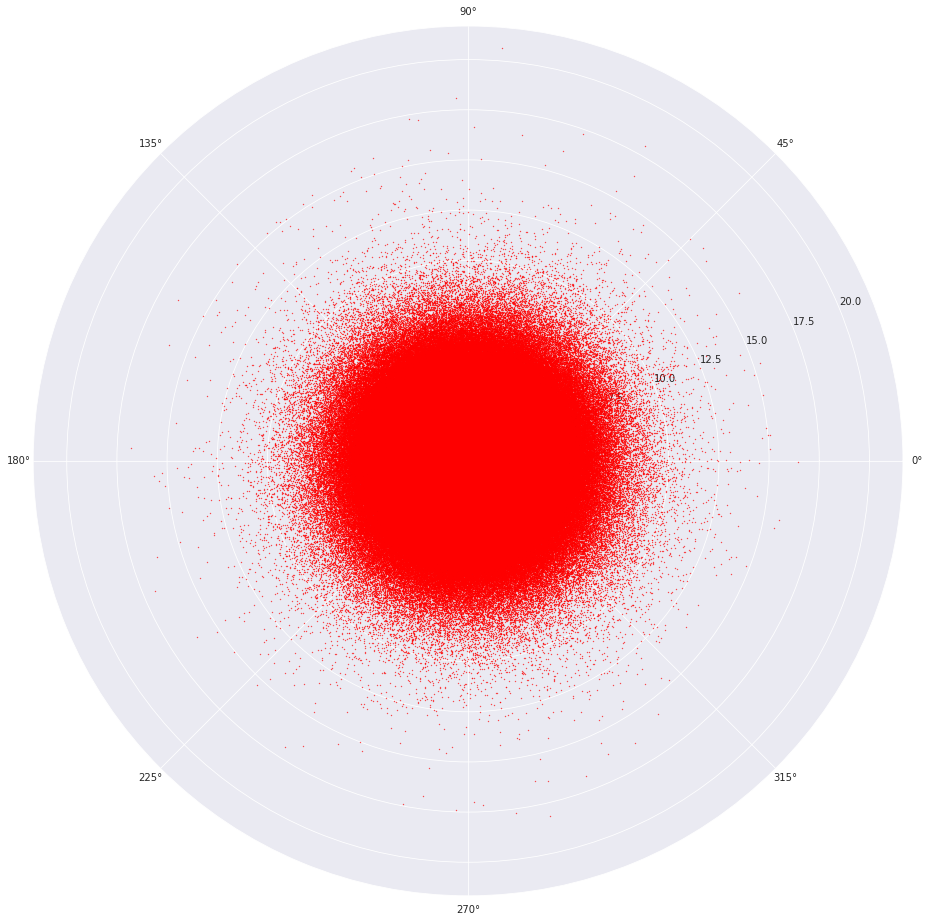

In [62]:
fig, ax = plt.subplots(subplot_kw=dict(polar=True))
ax.scatter(df_map.b, df_map.d, c='r', s = 0.1)
fig.set_figwidth(16)
fig.set_figheight(16)
plt.show()

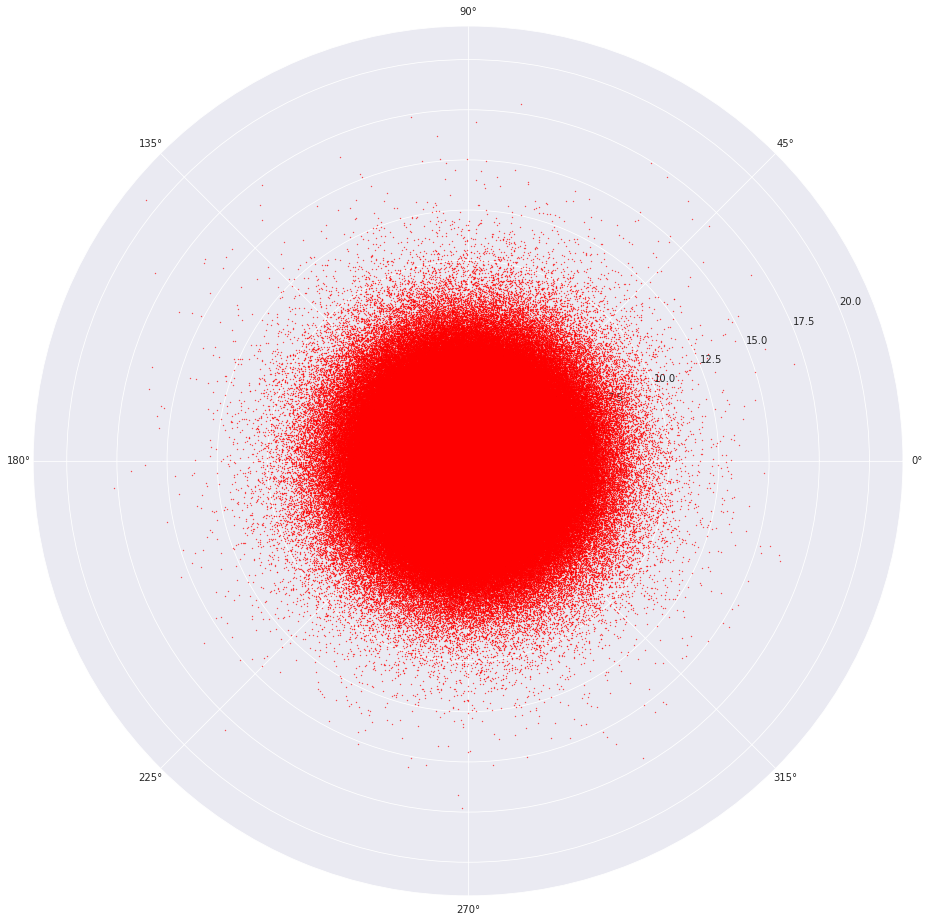

In [63]:
fig, ax = plt.subplots(subplot_kw=dict(polar=True))
ax.scatter(df_map.ra, df_map.d, c='r', s = 0.1)
fig.set_figwidth(16)
fig.set_figheight(16)
plt.show()

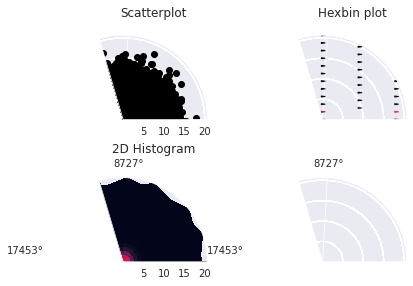

In [65]:
from scipy.stats import kde

#nbins = 20

fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True, subplot_kw=dict(polar=True))

axes[0, 0].set_title('Scatterplot')
axes[0, 0].plot(df_map.l, df_map.d, 'ko')

axes[0, 1].set_title('Hexbin plot')
axes[0, 1].hexbin(df_map.l, df_map.d, gridsize=nbins)

axes[1, 0].set_title('2D Histogram')
axes[1, 0].hist2d(df_map.l, df_map.d, bins=nbins)

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
#k = kde.gaussian_kde(df_map.ra, df_map.d)
#xi, yi = np.mgrid[df_map.ra.min():df_map.ra.max():nbins*1j, df_map.d.min():df_map.d.max():nbins*1j]
#zi = k(np.vstack([xi.flatten(), yi.flatten()]))

#axes[1, 1].set_title('Gaussian KDE')
#axes[1, 1].pcolormesh(xi, yi, zi.reshape(xi.shape))

fig.tight_layout()
plt.show()

In [51]:
def map(df_map):
    from astropy.coordinates import SkyCoord
    coord = SkyCoord(ra=df_map['ra'].values, dec=df_map['dec'].values, unit='deg')
    df_map['l'] = coord.galactic.l.deg
    df_map['b'] = coord.galactic.b.deg
    df_map.head()
    df_map['d'] = 1/df_map.parallax #парсек
    df_map.describe()
    fig, ax = plt.subplots(subplot_kw=dict(polar=True))
    ax.scatter(df_map.l, df_map.d, c='r', s = 0.1)
    fig.set_figwidth(16)
    fig.set_figheight(16)
    plt.show()

In [52]:
df_gaia1 = pd.read_csv('./input/gaia1.csv')
df_gaia1 = df_gaia1.dropna()
df_gaia1.head()

,parallax,parallax_error,ra,dec
0,0.155682,0.364230,69.291394,29.471229
1,1.800448,0.663118,69.300598,29.462582
3,-1.021261,0.478367,69.307463,29.470263
4,-0.138986,0.744581,69.306227,29.471945
5,-0.740479,0.940418,69.303275,29.478830


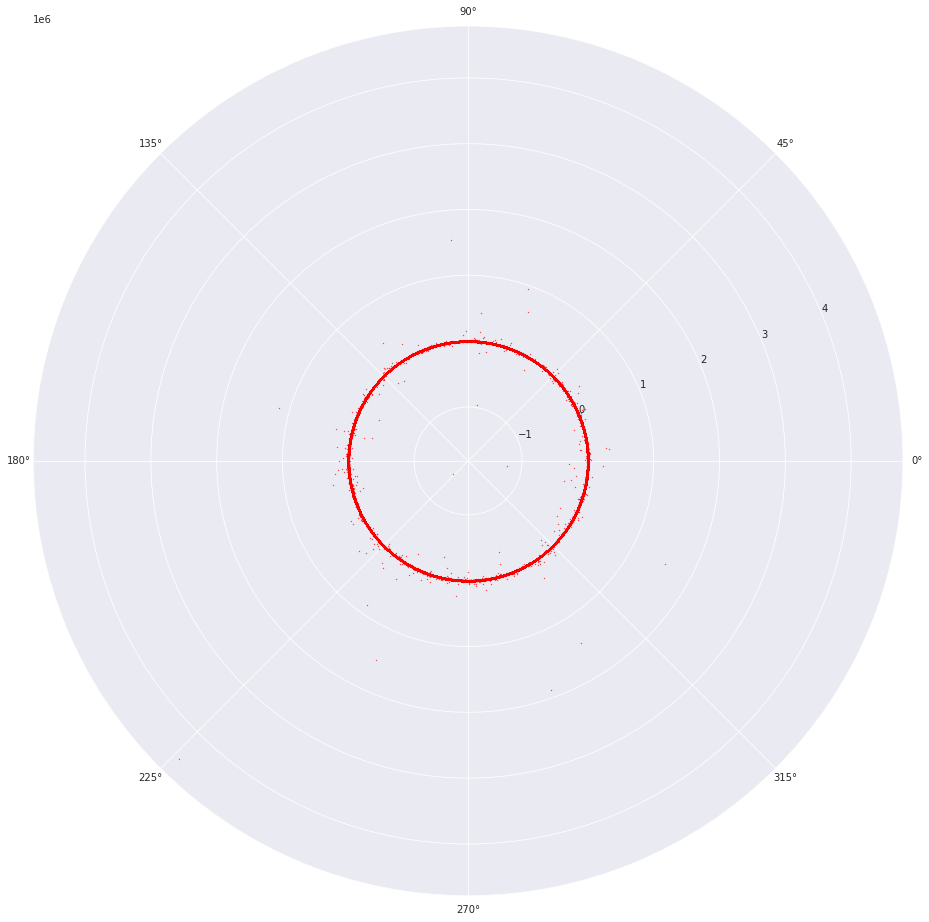

In [53]:
map(df_gaia1)

# Подготовка данных для классификатора

Изеняем метки класса в целые числа

In [42]:
df3 = df.copy()
labels = {'STAR':1, 'GALAXY':2, 'QSO':3}
df.replace({'class':labels}, inplace = True)
df.head()

/home/nadia/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,objID,ra,dec,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
0,1237671256908628119,71.158077,21.333093,0.000127,0.000007,1,K3,18.60245,16.39218,15.41919,15.02712,14.80693,18.56369,16.39435,15.41744,15.03489,14.80436
1,1237662224090988683,245.087060,21.761936,-0.000114,0.000021,1,WD1,17.05462,17.11506,17.52513,17.79336,18.08322,17.04298,17.10623,17.50796,17.80872,18.10710
2,1237678439696957925,31.079203,3.429988,0.600258,0.000121,2,NaN,24.68714,22.30432,20.88555,19.98248,19.67558,24.76204,21.75368,20.48914,19.52968,19.21125
3,1237658205035823360,144.343990,42.530499,3.204911,0.000755,3,NaN,24.69678,21.42912,21.20449,21.01514,21.40008,24.90437,21.41079,21.20130,21.02791,21.41992
4,1237667113333817747,142.735950,25.753559,2.302619,0.000296,3,BROADLINE,21.99980,21.40259,21.57071,21.51316,20.84446,21.94518,21.32935,21.49114,21.23290,20.86414


Создадим дополнительную выборуку, чтобы проэксперементировать с классификаторами, отделяющие только STAR

In [43]:
df2 = df3.copy()
labels = {'STAR':1, 'GALAXY':2, 'QSO':2}
df2.replace({'class':labels}, inplace = True)
df2.head()

,objID,ra,dec,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
0,1237671256908628119,71.158077,21.333093,0.000127,0.000007,1,K3,18.60245,16.39218,15.41919,15.02712,14.80693,18.56369,16.39435,15.41744,15.03489,14.80436
1,1237662224090988683,245.087060,21.761936,-0.000114,0.000021,1,WD1,17.05462,17.11506,17.52513,17.79336,18.08322,17.04298,17.10623,17.50796,17.80872,18.10710
2,1237678439696957925,31.079203,3.429988,0.600258,0.000121,2,NaN,24.68714,22.30432,20.88555,19.98248,19.67558,24.76204,21.75368,20.48914,19.52968,19.21125
3,1237658205035823360,144.343990,42.530499,3.204911,0.000755,2,NaN,24.69678,21.42912,21.20449,21.01514,21.40008,24.90437,21.41079,21.20130,21.02791,21.41992
4,1237667113333817747,142.735950,25.753559,2.302619,0.000296,2,BROADLINE,21.99980,21.40259,21.57071,21.51316,20.84446,21.94518,21.32935,21.49114,21.23290,20.86414


In [44]:
df3 

,objID,ra,dec,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
0,1237671256908628119,71.158077,21.333093,0.000127,0.000007,STAR,K3,18.60245,16.39218,15.41919,15.02712,14.80693,18.56369,16.39435,15.41744,15.03489,14.80436
1,1237662224090988683,245.087060,21.761936,-0.000114,0.000021,STAR,WD1,17.05462,17.11506,17.52513,17.79336,18.08322,17.04298,17.10623,17.50796,17.80872,18.10710
2,1237678439696957925,31.079203,3.429988,0.600258,0.000121,GALAXY,NaN,24.68714,22.30432,20.88555,19.98248,19.67558,24.76204,21.75368,20.48914,19.52968,19.21125
3,1237658205035823360,144.343990,42.530499,3.204911,0.000755,QSO,NaN,24.69678,21.42912,21.20449,21.01514,21.40008,24.90437,21.41079,21.20130,21.02791,21.41992
4,1237667113333817747,142.735950,25.753559,2.302619,0.000296,QSO,BROADLINE,21.99980,21.40259,21.57071,21.51316,20.84446,21.94518,21.32935,21.49114,21.23290,20.86414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5241713,1237680272571105645,328.088070,18.738578,-0.000010,0.000007,STAR,K5Ve (118100),21.17160,18.22463,16.95559,16.51219,16.14440,20.87629,18.22747,16.97745,16.49551,16.15476
5241714,1237653651306184879,19.098280,14.131638,0.316044,0.000045,GALAXY,NaN,22.56285,21.10023,19.45232,18.98361,18.53853,22.62634,20.30509,18.91942,18.29231,18.02235
5241715,1237663783118963291,349.348900,-0.661332,0.699559,0.000048,GALAXY,NaN,23.24423,23.09474,22.73910,22.20590,21.42973,22.54075,21.18786,22.32401,21.56820,18.79706
5241716,1237679476935295070,4.681285,21.984656,-0.000843,0.000012,STAR,F3/F5V (30743),18.69630,17.73908,17.30717,17.12296,17.04868,18.71272,17.72582,17.30536,17.11994,17.05235


In [ ]:
df4 = df3.copy()
df4 = df4.merge(df_par, how='inner', left_on='objID', right_on='objId')
#pd.merge(df4, df_par, how ='inner', on ='objID') 
df4

In [ ]:
df4.drop_duplicates()

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (24, 6))
sns.distplot(df4[df4['class'] == 'STAR'].cModelMag_r, ax = ax1, bins = 30, color = 'g')
sns.distplot(df4[df4['class'] == 'GALAXY'].cModelMag_r, ax = ax2, bins = 30, color = 'r')
sns.distplot(df4[df4['class'] == 'QSO'].cModelMag_r, ax = ax3, bins = 30, color = 'b')

В оригинальной тетрадке была отмечена зависимость признаков u, g, r, i, z (в этом можно убедиться на графиках выше), поэтому было осуществлено сжатие данных признаков с помощью PCA. Я этого делать не буду, т.к. хочу получить зависимость точности классификации STAR конкретно от признака r (звездной величины).

In [47]:
df = df.sort_values(by='cModelMag_r')

Data separation into features and labels

In [48]:
X = df.drop(['class','subClass'], axis = 1).values
y = df['class'].values
X.shape

(5241572, 15)

In [49]:
X2 = df2.drop(['class','subClass'], axis = 1).values
y2 = df2['class'].values
X2.shape

(5241572, 15)

Дополнительная выборка только звезд, на которой так же можно проверять точность:

In [50]:
Xs = df_star.drop(['class','subClass', 'mjd', 'plate', 'specObjID'], axis = 1).values
ys = np.ones(Xs.shape[0])
Xs.shape

(1103679, 15)

Разделение данных на обучающие и тестовые

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 123)

In [52]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 123)

In [53]:
np.unique(y_train, return_counts = True)

(array([1, 2, 3]), array([330860, 912384, 329227]))

In [54]:
np.unique(y2_test, return_counts = True)

(array([1, 2]), array([ 331445, 1241027]))

Учитывая колличество элементов в каждом значения признака class, тренировочная выборка нам подходит 

Because of presence of outliers we will be using RobustScaler to perform scaling on the data. For more about it look here:
https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf

In [55]:
robust = RobustScaler()
X_train = robust.fit_transform(X_train)
X_test = robust.transform(X_test)
X = robust.transform(X)
Xs = robust.transform(Xs)
X2_train = robust.fit_transform(X2_train)
X2_test = robust.transform(X2_test)
Xs.shape

(1103679, 15)

In [56]:
#переменные для разделения выборки по признаку cModelMag_r:
n = 30
m = df['cModelMag_r'].min()
N = (df['cModelMag_r'].max() - m) / n

def print_plot(ml): #функция построения графика зависимости метрик классификации от r
    
    precision = []
    recall = []
    f1 = []
    r_mean = []
    y_pred_all = ml.predict(X)

    for i in range(0, n):
        indx = (df['cModelMag_r'] >= (m + N * i)) & (df['cModelMag_r'] <= (m + N * (i + 1))) #создаем выборку с необходимым нам диапазоном r
        if len(y[indx]) > 100 and df[indx & df['class'] == 1].shape[0] > 1000:    #не будем брать слишком маленькие выборки
            h = classification_report(y[indx], y_pred_all[indx], output_dict=True, zero_division=0)
            precision.append(h['1']['precision'])
            recall.append(h['1']['recall'])
            f1.append(h['1']['f1-score'])
            r_mean.append(df['cModelMag_r'][indx].mean())
            
    plt.figure(figsize = (5,4))
    plt.title('Зависимость precision от признкака cModelMag_r:')
    plt.plot(r_mean, precision, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.figure(figsize = (5,4))
    plt.title('Зависимость recall от признкака cModelMag_r:')
    plt.plot(r_mean, recall, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.figure(figsize = (5,4))
    plt.title('Зависимость f1 от признкака cModelMag_r:')
    plt.plot(r_mean, f1, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    #indx = df['cModelMag_r'] < 15
    #indx1 = df['cModelMag_r'] < 18 & df['cModelMag_r'] > 16
    #return classification_report(y[indx], y_pred_all[indx], output_dict=True, zero_division=0)['1']['precision'], 

# Классификаторы

Logistic Regression 

In [62]:
lr = LogisticRegression(C = 1545, max_iter=10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97    772810
           2       0.96      0.97      0.97   2127512
           3       0.97      0.91      0.94    768779

    accuracy                           0.96   3669101
   macro avg       0.96      0.95      0.96   3669101
weighted avg       0.96      0.96      0.96   3669101

Confusion Matrix: 
 [[ 756393   16302     115]
 [  32205 2072294   23013]
 [   1783   71224  695772]]
Training Score:  0.9603547537601648
Testing Score:  0.9605783542072023


In [63]:
joblib.dump(lr, 'filename.pkl')

['filename.pkl']

In [57]:
lr = joblib.load('filename.pkl')

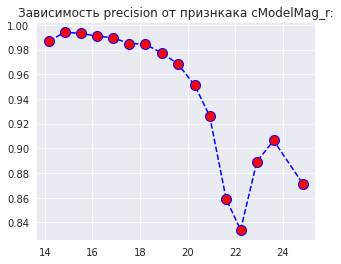

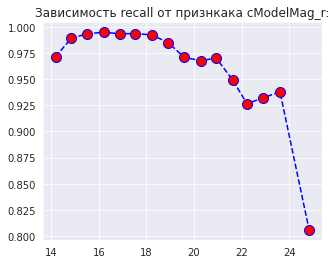

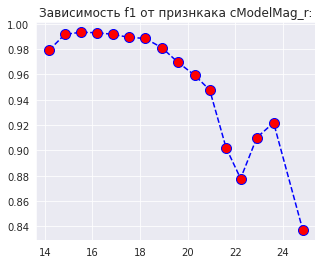

In [52]:
#lr_test_acc = printplot(lr)
print_plot(lr)

In [ ]:
lr2 = LogisticRegression(max_iter=500)
lr2.fit(X2_train, y2_train)
y2_pred = lr2.predict(X2_test)
print('Classification Report: \n', classification_report(y2_test, y2_pred))
print('Confusion Matrix: \n', confusion_matrix(y2_test, y2_pred))
lr2_train_acc = lr2.score(X2_train, y2_train)
print('Training Score: ', lr2_train_acc)
lr2_test_acc = lr2.score(X2_test, y2_test)
print('Testing Score: ', lr2_test_acc)


In [ ]:
print_plot(lr2)

In [60]:
sub_cl = df[df['class'] == 1]['subClass'].unique()
sub_cl.shape

(32,)

In [61]:
def score_sub_cl_star(model):
    sub = []
    score = []
    for i in range(sub_cl.shape[0]):
        indx_scl = df['subClass']==sub_cl[i]
        print(np.sum(y[indx_scl]))
        print(np.sum(indx_scl)) ####
        indx_not_st = df['class'].sample(10000) != 1
        indx = indx_scl | indx_not_st
        if df[indx].shape[0] > 20000: 

            ys_pr = model.predict(X[indx])
            print(sub_cl[i])
            print('Classification Report: \n', classification_report(y[indx], ys_pr))
            #print('Confusion Matrix: \n', confusion_matrix(ys[indx], ys_pr))
            lr_s = model.score(X[indx], y[indx])
            #print('Star Score: ', lr_s)
            #print(sub_cl[i], df_star[indx].shape[0], lr_s)
            sub.append(sub_cl[i])
            #print(sub)
            score.append(lr_s)
    #print(sub)
    M = [list(a) for a in zip(sub, score)]
    print(len(M))
    print(np.array(M))

In [62]:
score_sub_cl_star(lr)

14947
14947


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



WD
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      4742
           2       0.96      0.97      0.97     13321
           3       0.96      0.90      0.93      4789

    accuracy                           0.96     22852
   macro avg       0.96      0.95      0.95     22852
weighted avg       0.96      0.96      0.96     22852

29338
29338


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



K5
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      7704
           2       0.96      0.97      0.97     21667
           3       0.97      0.91      0.94      7844

    accuracy                           0.96     37215
   macro avg       0.96      0.95      0.96     37215
weighted avg       0.96      0.96      0.96     37215

71331
71331


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



A0
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97     16801
           2       0.96      0.97      0.97     45966
           3       0.96      0.91      0.93     16530

    accuracy                           0.96     79297
   macro avg       0.96      0.95      0.96     79297
weighted avg       0.96      0.96      0.96     79297

34239
34239


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



K3
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      8870
           2       0.96      0.97      0.97     24320
           3       0.97      0.91      0.94      8902

    accuracy                           0.96     42092
   macro avg       0.96      0.95      0.96     42092
weighted avg       0.96      0.96      0.96     42092

127103
127103


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



F9
Classification Report: 
               precision    recall  f1-score   support

           1       0.95      0.98      0.97     28492
           2       0.96      0.97      0.97     78433
           3       0.97      0.91      0.94     28144

    accuracy                           0.96    135069
   macro avg       0.96      0.95      0.96    135069
weighted avg       0.96      0.96      0.96    135069

31603
31603


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



G2
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      8301
           2       0.96      0.97      0.97     22985
           3       0.96      0.91      0.93      8232

    accuracy                           0.96     39518
   macro avg       0.96      0.95      0.96     39518
weighted avg       0.96      0.96      0.96     39518

105298
105298


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



F5
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97     23764
           2       0.96      0.98      0.97     65729
           3       0.97      0.90      0.94     23687

    accuracy                           0.96    113180
   macro avg       0.96      0.95      0.96    113180
weighted avg       0.96      0.96      0.96    113180

23063
23063


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



M3
Classification Report: 
               precision    recall  f1-score   support

           1       0.95      0.98      0.96      6524
           2       0.96      0.97      0.97     17879
           3       0.97      0.90      0.94      6529

    accuracy                           0.96     30932
   macro avg       0.96      0.95      0.96     30932
weighted avg       0.96      0.96      0.96     30932

19901
19901


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



K7
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      5862
           2       0.96      0.97      0.97     16095
           3       0.97      0.90      0.93      5844

    accuracy                           0.96     27801
   macro avg       0.96      0.95      0.96     27801
weighted avg       0.96      0.96      0.96     27801

32136
32136


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



K1
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      8464
           2       0.96      0.97      0.97     23137
           3       0.97      0.90      0.94      8418

    accuracy                           0.96     40019
   macro avg       0.96      0.95      0.96     40019
weighted avg       0.96      0.96      0.96     40019

27938
27938


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



M1
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      7629
           2       0.96      0.97      0.97     20741
           3       0.97      0.91      0.94      7498

    accuracy                           0.96     35868
   macro avg       0.96      0.95      0.96     35868
weighted avg       0.96      0.96      0.96     35868

77208
77208


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



F
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97     18003
           2       0.96      0.97      0.97     49296
           3       0.97      0.90      0.93     17832

    accuracy                           0.96     85131
   macro avg       0.96      0.95      0.96     85131
weighted avg       0.96      0.96      0.96     85131

16354
16354


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



OB
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      5148
           2       0.96      0.97      0.97     13977
           3       0.97      0.91      0.94      5080

    accuracy                           0.96     24205
   macro avg       0.96      0.95      0.96     24205
weighted avg       0.96      0.96      0.96     24205

19517
19517


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



G
Classification Report: 
               precision    recall  f1-score   support

           1       0.95      0.98      0.97      5772
           2       0.96      0.97      0.97     15920
           3       0.97      0.90      0.94      5714

    accuracy                           0.96     27406
   macro avg       0.96      0.95      0.96     27406
weighted avg       0.96      0.96      0.96     27406

16438
16438


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



K
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      5197
           2       0.96      0.97      0.96     14025
           3       0.97      0.90      0.93      5086

    accuracy                           0.96     24308
   macro avg       0.96      0.95      0.95     24308
weighted avg       0.96      0.96      0.96     24308

18880
18880


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



M2
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      5754
           2       0.96      0.97      0.97     15456
           3       0.97      0.91      0.94      5501

    accuracy                           0.96     26711
   macro avg       0.96      0.95      0.96     26711
weighted avg       0.96      0.96      0.96     26711

15919
15919


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



M0
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      5091
           2       0.96      0.97      0.96     13722
           3       0.96      0.90      0.93      5000

    accuracy                           0.96     23813
   macro avg       0.96      0.95      0.95     23813
weighted avg       0.96      0.96      0.96     23813

9743
9743


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



16522
16522


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



C
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      5128
           2       0.96      0.98      0.97     14179
           3       0.97      0.91      0.94      5117

    accuracy                           0.96     24424
   macro avg       0.96      0.96      0.96     24424
weighted avg       0.96      0.96      0.96     24424

102933
102933


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



F3/F5V (30743)
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97     23452
           2       0.96      0.97      0.97     64377
           3       0.97      0.91      0.94     23064

    accuracy                           0.96    110893
   macro avg       0.96      0.95      0.96    110893
weighted avg       0.96      0.96      0.96    110893

15619
15619


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



G8
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      5014
           2       0.96      0.97      0.97     13640
           3       0.96      0.90      0.93      4872

    accuracy                           0.96     23526
   macro avg       0.96      0.95      0.96     23526
weighted avg       0.96      0.96      0.96     23526

26674
26674


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



G0
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      7324
           2       0.96      0.97      0.97     19999
           3       0.97      0.91      0.94      7255

    accuracy                           0.96     34578
   macro avg       0.96      0.95      0.96     34578
weighted avg       0.96      0.96      0.96     34578

27386
27386


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



WD1
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      7381
           2       0.96      0.97      0.97     20478
           3       0.97      0.91      0.94      7364

    accuracy                           0.96     35223
   macro avg       0.96      0.95      0.96     35223
weighted avg       0.96      0.96      0.96     35223

21233
21233


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



K3V (32147)
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      6016
           2       0.96      0.98      0.97     16813
           3       0.97      0.91      0.94      6287

    accuracy                           0.96     29116
   macro avg       0.96      0.95      0.96     29116
weighted avg       0.96      0.96      0.96     29116

38154
38154


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



M4
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      9709
           2       0.96      0.97      0.97     26711
           3       0.97      0.90      0.93      9650

    accuracy                           0.96     46070
   macro avg       0.96      0.95      0.96     46070
weighted avg       0.96      0.96      0.96     46070

20002
20002


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



F8
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      5781
           2       0.96      0.97      0.97     16295
           3       0.97      0.90      0.93      5793

    accuracy                           0.96     27869
   macro avg       0.96      0.95      0.96     27869
weighted avg       0.96      0.96      0.96     27869

23043
23043


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



A
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      6535
           2       0.96      0.98      0.97     17920
           3       0.97      0.91      0.94      6473

    accuracy                           0.96     30928
   macro avg       0.96      0.95      0.96     30928
weighted avg       0.96      0.96      0.96     30928

24081
24081


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



M
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      6667
           2       0.96      0.97      0.97     18609
           3       0.96      0.90      0.93      6665

    accuracy                           0.96     31941
   macro avg       0.96      0.95      0.96     31941
weighted avg       0.96      0.96      0.96     31941

14750
14750


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



K0
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      4742
           2       0.96      0.97      0.97     13141
           3       0.97      0.90      0.93      4698

    accuracy                           0.96     22581
   macro avg       0.96      0.95      0.96     22581
weighted avg       0.96      0.96      0.96     22581

13943
13943


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



K5Ve (118100)
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      4627
           2       0.96      0.98      0.97     12706
           3       0.97      0.91      0.94      4539

    accuracy                           0.96     21872
   macro avg       0.96      0.95      0.96     21872
weighted avg       0.96      0.96      0.96     21872

18985
18985


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



A12
Classification Report: 
               precision    recall  f1-score   support

           1       0.95      0.98      0.97      5594
           2       0.96      0.97      0.97     15623
           3       0.97      0.90      0.94      5694

    accuracy                           0.96     26911
   macro avg       0.96      0.95      0.96     26911
weighted avg       0.96      0.96      0.96     26911

49389
49389


<ipython-input-61-2db043357c29>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



M5
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97     12123
           2       0.96      0.97      0.97     33116
           3       0.97      0.91      0.94     12004

    accuracy                           0.96     57243
   macro avg       0.96      0.95      0.96     57243
weighted avg       0.96      0.96      0.96     57243

31
[['WD' '0.9585156660248556']
 ['K5' '0.9611715706032514']
 ['A0' '0.9602759246881976']
 ['K3' '0.9610852418511832']
 ['F9' '0.959739096313736']
 ['G2' '0.9606255377296422']
 ['F5' '0.9610355186428697']
 ['M3' '0.9590715117030907']
 ['K7' '0.9599294989388871']
 ['K1' '0.9606936705065094']
 ['M1' '0.9599364335898294']
 ['F' '0.9604609366740671']
 ['OB' '0.9608758520966743']
 ['G' '0.9600452455666643']
 ['K' '0.9587378640776699']
 ['M2' '0.9617386095616038']
 ['M0' '0.9583420820560198']
 ['C' '0.9632738290206354']
 ['F3/F5V (30743)' '0.9612329001830593']
 ['G8' '0.9597041571027799']
 

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (8, 6))
sns.countplot(score, palette = 'magma')

In [63]:
def roc(model, X_test, y_test, lab):
    from sklearn.metrics import roc_curve
    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")

    plt.figure(figsize=(10, 8))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=lab)
    lw = 2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.savefig("ROC.png")
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
y_scores = lr.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of lr')
plt.show()

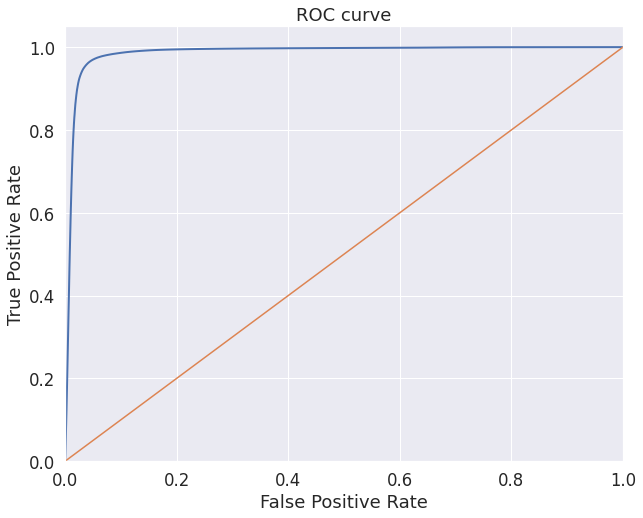

In [64]:
roc(lr, X, y, 2)

Support Vector Classification

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
svc_train_acc = svc.score(X_train, y_train)
print('Training Score: ', svc_train_acc)
svc_test_acc = svc.score(X_test, y_test)
print('Testing Score: ', svc_test_acc)

In [1]:
#svc_test_acc = print_plot(svc)

Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
dt_train_acc = dt.score(X_train, y_train)
print('Training Score: ', dt_train_acc)
dt_test_acc = dt.score(X_test, y_test)
print('Testing Score: ', dt_test_acc)

In [ ]:
#dt_test_acc = print_plot(dt)

Ensemble Methods

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
rf_train_acc = rf.score(X_train, y_train)
print('Training Score: ', rf_train_acc)
rf_test_acc = rf.score(X_test, y_test)
print('Testing Score: ', rf_test_acc)

In [ ]:
#rf_test_acc = print_plot(rf)

In [ ]:
adb = AdaBoostClassifier(rf)
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
adb_train_acc = adb.score(X_train, y_train)
print('Training Score: ', adb_train_acc)
adb_test_acc = adb.score(X_test, y_test)
print('Testing Score: ', adb_test_acc)

In [ ]:
#adb_test_acc = print_plot(adb)

In [ ]:
gdb = GradientBoostingClassifier()
gdb.fit(X_train, y_train)
y_pred = adb.predict(X_test)
print('Classification Report: \n0', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
gdb_train_acc = gdb.score(X_train, y_train)
print('Training Score: ', gdb_train_acc)
gdb_test_acc = gdb.score(X_test, y_test)
print('Testing Score: ', gdb_test_acc)

In [ ]:
#gdb_test_acc = print_plot(gdb)

K Nearest Neighbors Classification

In [17]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Plotting error rate vs. number of neighbors

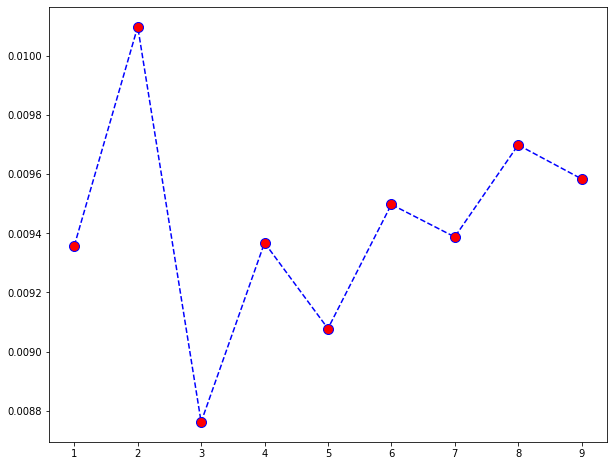

In [21]:
plt.figure(figsize = (10,8))
plt.plot(range(1,10), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

In [65]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
knn_train_acc = knn.score(X_train, y_train)
print('Training Score: ', knn_train_acc)
knn_test_acc = knn.score(X_test, y_test)
print('Testing Score: ', knn_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       0.97      0.98      0.98    772810
           2       0.98      0.98      0.98   2127512
           3       0.97      0.95      0.96    768779

    accuracy                           0.98   3669101
   macro avg       0.97      0.97      0.97   3669101
weighted avg       0.98      0.98      0.98   3669101

Confusion Matrix: 
 [[ 760602    8392    3816]
 [  18862 2090548   18102]
 [   4101   33684  730994]]
Training Score:  0.9811290637474396
Testing Score:  0.9763001890653868


In [66]:
joblib.dump(knn, 'filename1.pkl')

['filename1.pkl']

In [61]:
knn = joblib.load('filename1.pkl')

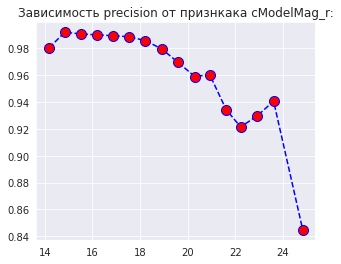

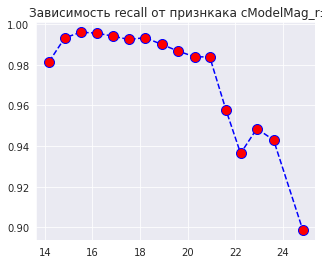

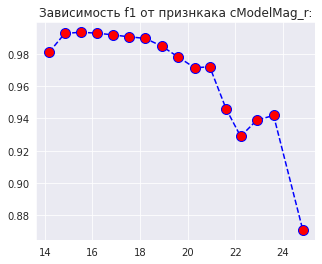

In [67]:
#knn_test_acc = print_plot(knn)
print_plot(knn)

In [ ]:
roc(knn)

In [28]:
ys_pr = knn.predict(Xs)
print('Classification Report: \n', classification_report(ys, ys_pr))
print('Confusion Matrix: \n', confusion_matrix(ys, ys_pr))
knn_s = knn.score(Xs, ys)
print('Star Score: ', knn_s)

/home/nadia/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      0.47      0.64   1156692
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0

    accuracy                           0.47   1156692
   macro avg       0.33      0.16      0.21   1156692
weighted avg       1.00      0.47      0.64   1156692

Confusion Matrix: 
 [[543489 463637 149566]
 [     0      0      0]
 [     0      0      0]]
Star Score:  0.46986492514861344


In [ ]:
#print([df['r'].min(), df['r'].max()]) #интервал значений r

Проверка точности была проведена не для всех интерваллов r, из-за осутсвия достаточного кол-ва данных о них. Но заметим сходство для графиков precision от признкака r. Наименьшую точность классификаторы показывают для r < 15. 
Сравним показатели precision при r < 15 для разных классификаторов.

In [ ]:
trace1 = go.Bar(
    x=['Logistic Regression','SVC','Decision Tree','Random Forest','AdaBoost','Gradient Boosting','KNN'],
    y=[lr_test_acc,svc_test_acc,dt_test_acc,rf_test_acc,adb_test_acc,gdb_test_acc,knn_test_acc],
    name = 'Accuracy Comparisons of the 4 algorithms',
        marker=dict(
                
    ),
)

layout = go.Layout(
    title='Precision классификации звезд с r < 15'
)

data = [trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Ratio")

Так же стоит отметить "провисание" precision в интервале 16 < r < 18. Это можно объяснить тем, что такие значения r характерны как для звезд, так и для галактик:

In [ ]:
#sns.pairplot(data = df1, palette = 'Dark2', vars='r', hue = 'class', height=4, aspect=3)